In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from pandas.core import datetools

/Users/nadiahaven/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in the data. 
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_ohio_by_city_2013.csv', header=1, skiprows=range(1, 4))
# Take a peek.

# Prettier plots are better.
#sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
#sns.boxplot(x="admit", y="gpa", data=df)
#plt.show()
#sns.boxplot(x="admit", y="gre", data=df)
#plt.show()

# Relationship between predictors.
#sns.regplot(x='gre', y='gpa', data=df)
#plt.show()

In [3]:
df = df.iloc[:, :-1]

In [4]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Ada,"5,755",7,0.0,2.0,NaN,0,5,76,21,55,0,2.0
1,Akron,"198,405","1,570",23.0,160.0,NaN,528,859,"9,649","3,096","5,922",631,85.0
2,Albany,877,0,0.0,0.0,NaN,0,0,22,3,19,0,0.0
3,Alliance,"22,144",83,1.0,14.0,NaN,12,56,978,237,719,22,4.0
4,Amberley Village,"3,585",1,0.0,NaN,1.0,0,0,60,15,39,6,0.0


In [5]:
df= df.rename(index=str, columns={"Population": "population", "Violent\ncrime": "violent_crime", "Murder and\nnonnegligent\nmanslaughter":"Murder_and_NNM", "Rape\n(revised\ndefinition)1": "rape_newdef", "Rape\n(legacy\ndefinition)2": "rape_olddef", "Robbery": "robbery", "Aggravated\nassault": "aggravated_assault", "Property\ncrime": "property_crime", "Burglary":"burglary", "Larceny-\ntheft": "larceny", "Motor\nvehicle\ntheft": "motor_vehicle_theft", "Arson3": "arson" 
                    })

In [6]:
df.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
0,Ada,"5,755",7,0.0,2.0,NaN,0,5,76,21,55,0,2.0
1,Akron,"198,405","1,570",23.0,160.0,NaN,528,859,"9,649","3,096","5,922",631,85.0
2,Albany,877,0,0.0,0.0,NaN,0,0,22,3,19,0,0.0
3,Alliance,"22,144",83,1.0,14.0,NaN,12,56,978,237,719,22,4.0
4,Amberley Village,"3,585",1,0.0,NaN,1.0,0,0,60,15,39,6,0.0


In [7]:
list(df)

['City',
 'population',
 'violent_crime',
 'Murder_and_NNM',
 'rape_newdef',
 'rape_olddef',
 'robbery',
 'aggravated_assault',
 'property_crime',
 'burglary',
 'larceny',
 'motor_vehicle_theft',
 'arson']

In [8]:
df.describe()

,Murder_and_NNM,rape_newdef,rape_olddef,arson
count,343.000000,287.000000,56.000000,334.000000
mean,0.912536,6.630662,6.446429,4.356287
std,5.499435,30.516008,13.781304,23.989149
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000
75%,0.000000,4.000000,6.000000,2.000000
max,70.000000,417.000000,72.000000,317.000000


In [9]:
df["population"] = df["population"].str.replace(",","").astype(float)
df["violent_crime"] = df["violent_crime"].str.replace(",","").astype(float)
df["robbery"] = df["robbery"].str.replace(",","").astype(float)
df["aggravated_assault"] = df["aggravated_assault"].str.replace(",","").astype(float)
df["property_crime"] = df["property_crime"].str.replace(",","").astype(float)
df["burglary"] = df["burglary"].str.replace(",","").astype(float)
df["larceny"] = df["larceny"].str.replace(",","").astype(float)
df["motor_vehicle_theft"] = df["motor_vehicle_theft"].str.replace(",","").astype(float)

In [10]:
df.dtypes

City                    object
population             float64
violent_crime          float64
Murder_and_NNM         float64
rape_newdef            float64
rape_olddef            float64
robbery                float64
aggravated_assault     float64
property_crime         float64
burglary               float64
larceny                float64
motor_vehicle_theft    float64
arson                  float64
dtype: object

In [11]:
df.describe()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
count,343.000000,343.000000,343.000000,287.000000,56.000000,343.000000,343.000000,342.000000,343.000000,342.000000,343.000000,334.000000
mean,16698.434402,65.903790,0.912536,6.630662,6.446429,30.204082,28.186589,561.283626,157.002915,386.122807,36.367347,4.356287
std,34319.391321,396.171849,5.499435,30.516008,13.781304,218.138186,157.136604,1770.426306,659.714308,976.859245,245.540874,23.989149
min,414.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3668.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,51.250000,9.000000,38.250000,1.000000,0.000000
50%,8387.000000,7.000000,0.000000,1.000000,1.000000,2.000000,3.000000,159.000000,30.000000,122.500000,4.000000,0.000000
75%,18711.000000,21.000000,0.000000,4.000000,6.000000,7.500000,8.000000,472.750000,85.000000,370.250000,13.000000,2.000000
max,389181.000000,5751.000000,70.000000,417.000000,72.000000,3490.000000,1789.000000,23168.000000,8259.000000,10784.000000,4125.000000,317.000000


In [12]:
df['crime']= df['violent_crime'] + df['property_crime']

In [13]:
df.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime
0,Ada,5755.0,7.0,0.0,2.0,NaN,0.0,5.0,76.0,21.0,55.0,0.0,2.0,83.0
1,Akron,198405.0,1570.0,23.0,160.0,NaN,528.0,859.0,9649.0,3096.0,5922.0,631.0,85.0,11219.0
2,Albany,877.0,0.0,0.0,0.0,NaN,0.0,0.0,22.0,3.0,19.0,0.0,0.0,22.0
3,Alliance,22144.0,83.0,1.0,14.0,NaN,12.0,56.0,978.0,237.0,719.0,22.0,4.0,1061.0
4,Amberley Village,3585.0,1.0,0.0,NaN,1.0,0.0,0.0,60.0,15.0,39.0,6.0,0.0,61.0


In [14]:
df['cpc'] = df['crime'] / df['population']

In [15]:
df.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc
0,Ada,5755.0,7.0,0.0,2.0,NaN,0.0,5.0,76.0,21.0,55.0,0.0,2.0,83.0,0.014422
1,Akron,198405.0,1570.0,23.0,160.0,NaN,528.0,859.0,9649.0,3096.0,5922.0,631.0,85.0,11219.0,0.056546
2,Albany,877.0,0.0,0.0,0.0,NaN,0.0,0.0,22.0,3.0,19.0,0.0,0.0,22.0,0.025086
3,Alliance,22144.0,83.0,1.0,14.0,NaN,12.0,56.0,978.0,237.0,719.0,22.0,4.0,1061.0,0.047914
4,Amberley Village,3585.0,1.0,0.0,NaN,1.0,0.0,0.0,60.0,15.0,39.0,6.0,0.0,61.0,0.017015


In [16]:
df.sort_values(by='cpc', ascending=False)

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc
127,Holland,1758.0,8.0,0.0,0.0,NaN,5.0,3.0,257.0,9.0,246.0,2.0,0.0,265.0,0.150739
90,Fairfax,1692.0,1.0,0.0,0.0,NaN,1.0,0.0,239.0,8.0,230.0,1.0,0.0,240.0,0.141844
88,Evendale,2762.0,8.0,0.0,NaN,1.0,0.0,7.0,364.0,10.0,348.0,6.0,0.0,372.0,0.134685
191,Moraine,6317.0,30.0,1.0,4.0,NaN,13.0,12.0,720.0,93.0,610.0,17.0,3.0,750.0,0.118727
222,Ontario,6137.0,7.0,0.0,2.0,NaN,2.0,3.0,662.0,23.0,632.0,7.0,0.0,669.0,0.109011
64,Coalton,469.0,2.0,1.0,0.0,NaN,1.0,0.0,46.0,7.0,38.0,1.0,NaN,48.0,0.102345
102,Gallipolis,3634.0,4.0,0.0,0.0,NaN,1.0,3.0,341.0,31.0,306.0,4.0,1.0,345.0,0.094937
56,Chillicothe,21679.0,73.0,0.0,8.0,NaN,29.0,36.0,1943.0,393.0,1517.0,33.0,2.0,2016.0,0.092993
181,Middletown,48691.0,301.0,0.0,NaN,39.0,75.0,187.0,3974.0,972.0,2907.0,95.0,8.0,4275.0,0.087799
241,Portsmouth,20322.0,89.0,0.0,9.0,NaN,32.0,48.0,1578.0,362.0,1165.0,51.0,2.0,1667.0,0.082029


In [17]:
df.drop(df.tail(4).index,inplace=True)

In [18]:
df.tail()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc
338,Wyoming,8387.0,2.0,0.0,0.0,NaN,0.0,2.0,171.0,54.0,109.0,8.0,1.0,173.0,0.020627
339,Xenia,26038.0,55.0,1.0,12.0,NaN,21.0,21.0,1049.0,212.0,812.0,25.0,6.0,1104.0,0.042400
340,Yellow Springs,3539.0,3.0,0.0,1.0,NaN,0.0,2.0,25.0,11.0,14.0,0.0,0.0,28.0,0.007912
341,Youngstown,64938.0,526.0,14.0,26.0,NaN,168.0,318.0,3570.0,1671.0,1602.0,297.0,28.0,4096.0,0.063076
342,Zanesville,25378.0,103.0,1.0,16.0,NaN,38.0,48.0,1601.0,286.0,1283.0,32.0,8.0,1704.0,0.067145


In [19]:
df=df.fillna(0)

In [20]:
df.head(n=100)

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc
0,Ada,5755.0,7.0,0.0,2.0,0.0,0.0,5.0,76.0,21.0,55.0,0.0,2.0,83.0,0.014422
1,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,5922.0,631.0,85.0,11219.0,0.056546
2,Albany,877.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,3.0,19.0,0.0,0.0,22.0,0.025086
3,Alliance,22144.0,83.0,1.0,14.0,0.0,12.0,56.0,978.0,237.0,719.0,22.0,4.0,1061.0,0.047914
4,Amberley Village,3585.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,15.0,39.0,6.0,0.0,61.0,0.017015
5,Amelia,4870.0,1.0,0.0,0.0,0.0,1.0,0.0,32.0,6.0,25.0,1.0,1.0,33.0,0.006776
6,American Township,12318.0,2.0,0.0,0.0,0.0,1.0,1.0,147.0,12.0,130.0,5.0,0.0,149.0,0.012096
7,Amherst,12040.0,9.0,0.0,0.0,0.0,8.0,1.0,219.0,39.0,177.0,3.0,2.0,228.0,0.018937
8,Arcanum,2098.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,23.0,2.0,0.0,33.0,0.015729
9,Ashland,20306.0,14.0,0.0,10.0,0.0,3.0,1.0,519.0,80.0,433.0,6.0,6.0,533.0,0.026248


In [21]:
df.head(n=100)

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc
0,Ada,5755.0,7.0,0.0,2.0,0.0,0.0,5.0,76.0,21.0,55.0,0.0,2.0,83.0,0.014422
1,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,5922.0,631.0,85.0,11219.0,0.056546
2,Albany,877.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,3.0,19.0,0.0,0.0,22.0,0.025086
3,Alliance,22144.0,83.0,1.0,14.0,0.0,12.0,56.0,978.0,237.0,719.0,22.0,4.0,1061.0,0.047914
4,Amberley Village,3585.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,15.0,39.0,6.0,0.0,61.0,0.017015
5,Amelia,4870.0,1.0,0.0,0.0,0.0,1.0,0.0,32.0,6.0,25.0,1.0,1.0,33.0,0.006776
6,American Township,12318.0,2.0,0.0,0.0,0.0,1.0,1.0,147.0,12.0,130.0,5.0,0.0,149.0,0.012096
7,Amherst,12040.0,9.0,0.0,0.0,0.0,8.0,1.0,219.0,39.0,177.0,3.0,2.0,228.0,0.018937
8,Arcanum,2098.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,23.0,2.0,0.0,33.0,0.015729
9,Ashland,20306.0,14.0,0.0,10.0,0.0,3.0,1.0,519.0,80.0,433.0,6.0,6.0,533.0,0.026248


In [22]:
df['m_rate'] = df['Murder_and_NNM'] / df["population"]

In [23]:
df_income = pd.read_csv('Ohio income.csv', header=1)

In [24]:
df_income.head()

,Rank,City,2012-2016 Median family income,2007-2011 Median family income,2012-2016 Median household income,2007-2011 Median household income
0,1,New Albany,"$214,850","$202,243","$191,375","$182,321"
1,2,Indian Hill,"$211,795","$250,000+","$205,221","$243,500"
2,3,Pepper Pike,"$186,765","$171,547","$164,471","$151,250"
3,4,Powell,"$146,442","$151,066","$132,917","$142,083"
4,5,Dublin,"$144,005","$143,619","$125,540","$121,431"


In [25]:
df_new = pd.merge(df, df_income, on='City', how='inner')

In [26]:
df_new.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,2012-2016 Median family income,2007-2011 Median family income,2012-2016 Median household income,2007-2011 Median household income
0,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,...,631.0,85.0,11219.0,0.056546,0.000116,219,"$45,018","$46,765","$35,240","$36,511"
1,Alliance,22144.0,83.0,1.0,14.0,0.0,12.0,56.0,978.0,237.0,...,22.0,4.0,1061.0,0.047914,0.000045,228,"$42,092","$43,559","$32,058","$34,184"
2,Amherst,12040.0,9.0,0.0,0.0,0.0,8.0,1.0,219.0,39.0,...,3.0,2.0,228.0,0.018937,0.000000,72,"$76,463","$77,891","$66,731","$65,483"
3,Ashland,20306.0,14.0,0.0,10.0,0.0,3.0,1.0,519.0,80.0,...,6.0,6.0,533.0,0.026248,0.000000,167,"$52,598","$57,996","$39,417","$43,003"
4,Athens,23721.0,17.0,0.0,3.0,0.0,3.0,11.0,406.0,49.0,...,4.0,0.0,423.0,0.017832,0.000000,120,"$62,500","$71,017","$22,204","$23,172"


In [27]:
df_new = df_new.replace(np.inf, 0)

In [28]:
df_new.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,2012-2016 Median family income,2007-2011 Median family income,2012-2016 Median household income,2007-2011 Median household income
0,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,...,631.0,85.0,11219.0,0.056546,0.000116,219,"$45,018","$46,765","$35,240","$36,511"
1,Alliance,22144.0,83.0,1.0,14.0,0.0,12.0,56.0,978.0,237.0,...,22.0,4.0,1061.0,0.047914,0.000045,228,"$42,092","$43,559","$32,058","$34,184"
2,Amherst,12040.0,9.0,0.0,0.0,0.0,8.0,1.0,219.0,39.0,...,3.0,2.0,228.0,0.018937,0.000000,72,"$76,463","$77,891","$66,731","$65,483"
3,Ashland,20306.0,14.0,0.0,10.0,0.0,3.0,1.0,519.0,80.0,...,6.0,6.0,533.0,0.026248,0.000000,167,"$52,598","$57,996","$39,417","$43,003"
4,Athens,23721.0,17.0,0.0,3.0,0.0,3.0,11.0,406.0,49.0,...,4.0,0.0,423.0,0.017832,0.000000,120,"$62,500","$71,017","$22,204","$23,172"


In [29]:
df_new.corr()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank
population,1.000000,0.942972,0.925405,0.939845,0.125868,0.912463,0.954313,0.976769,0.968273,0.965314,0.884824,0.950810,0.975990,0.299019,0.511047,0.220264
violent_crime,0.942972,1.000000,0.899035,0.978918,0.088954,0.991577,0.980709,0.963708,0.978712,0.909996,0.981294,0.959599,0.975138,0.297480,0.463424,0.259433
Murder_and_NNM,0.925405,0.899035,1.000000,0.879843,0.072775,0.871235,0.908442,0.937606,0.938198,0.930337,0.813175,0.948608,0.935784,0.292059,0.616270,0.266643
rape_newdef,0.939845,0.978918,0.879843,1.000000,-0.056159,0.964004,0.969194,0.950043,0.964087,0.900585,0.955558,0.951594,0.960102,0.288221,0.437213,0.262704
rape_olddef,0.125868,0.088954,0.072775,-0.056159,1.000000,0.062086,0.115780,0.150878,0.115760,0.187753,0.068814,0.047224,0.140824,0.229963,0.204998,0.144494
robbery,0.912463,0.991577,0.871235,0.964004,0.062086,1.000000,0.947403,0.936854,0.954484,0.873437,0.990285,0.944191,0.951372,0.266867,0.418721,0.227354
aggravated_assault,0.954313,0.980709,0.908442,0.969194,0.115780,0.947403,1.000000,0.969482,0.981934,0.929714,0.937851,0.949100,0.976551,0.329541,0.511320,0.296275
property_crime,0.976769,0.963708,0.937606,0.950043,0.150878,0.936854,0.969482,1.000000,0.992887,0.986562,0.908650,0.971367,0.998906,0.421735,0.530545,0.326113
burglary,0.968273,0.978712,0.938198,0.964087,0.115760,0.954484,0.981934,0.992887,1.000000,0.962929,0.932257,0.975083,0.995630,0.377603,0.534127,0.319057
larceny,0.965314,0.909996,0.930337,0.900585,0.187753,0.873437,0.929714,0.986562,0.962929,1.000000,0.832942,0.944711,0.978342,0.472410,0.541758,0.343418


In [30]:
df_new.dtypes

City                                     object
population                              float64
violent_crime                           float64
Murder_and_NNM                          float64
rape_newdef                             float64
rape_olddef                             float64
robbery                                 float64
aggravated_assault                      float64
property_crime                          float64
burglary                                float64
larceny                                 float64
motor_vehicle_theft                     float64
arson                                   float64
crime                                   float64
cpc                                     float64
m_rate                                  float64
Rank                                      int64
2012-2016\nMedian\nfamily\nincome        object
2007-2011\nMedian\nfamily\nincome        object
2012-2016\nMedian\nhousehold\nincome     object
2007-2011\nMedian\nhousehold\nincome    

In [31]:
df_new= df_new.rename(index=str, columns={"2012-2016\nMedian\nfamily\nincome": "med_fam_income_2012_2016", "2007-2011\nMedian\nfamily\nincome": "med_family_income_2007_2011", "2012-2016\nMedian\nhousehold\nincome" : "med_hh_income_2012_2016", "2007-2011\nMedian\nhousehold\nincome" : "med_hh_income_2007_2011" 
                    })

In [32]:
df_new.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,med_hh_income_2012_2016,med_hh_income_2007_2011
0,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,...,631.0,85.0,11219.0,0.056546,0.000116,219,"$45,018","$46,765","$35,240","$36,511"
1,Alliance,22144.0,83.0,1.0,14.0,0.0,12.0,56.0,978.0,237.0,...,22.0,4.0,1061.0,0.047914,0.000045,228,"$42,092","$43,559","$32,058","$34,184"
2,Amherst,12040.0,9.0,0.0,0.0,0.0,8.0,1.0,219.0,39.0,...,3.0,2.0,228.0,0.018937,0.000000,72,"$76,463","$77,891","$66,731","$65,483"
3,Ashland,20306.0,14.0,0.0,10.0,0.0,3.0,1.0,519.0,80.0,...,6.0,6.0,533.0,0.026248,0.000000,167,"$52,598","$57,996","$39,417","$43,003"
4,Athens,23721.0,17.0,0.0,3.0,0.0,3.0,11.0,406.0,49.0,...,4.0,0.0,423.0,0.017832,0.000000,120,"$62,500","$71,017","$22,204","$23,172"


In [33]:
df_new.dtypes

City                            object
population                     float64
violent_crime                  float64
Murder_and_NNM                 float64
rape_newdef                    float64
rape_olddef                    float64
robbery                        float64
aggravated_assault             float64
property_crime                 float64
burglary                       float64
larceny                        float64
motor_vehicle_theft            float64
arson                          float64
crime                          float64
cpc                            float64
m_rate                         float64
Rank                             int64
med_fam_income_2012_2016        object
med_family_income_2007_2011     object
med_hh_income_2012_2016         object
med_hh_income_2007_2011         object
dtype: object

In [34]:
df_new=df_new.sort_values(by='Rank')

In [35]:
df_new.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,med_hh_income_2012_2016,med_hh_income_2007_2011
105,New Albany,8772.0,2.0,0.0,0.0,0.0,0.0,2.0,99.0,24.0,...,0.0,2.0,101.0,0.011514,0.0,1,"$214,850","$202,243","$191,375","$182,321"
72,Indian Hill,5789.0,2.0,0.0,0.0,0.0,0.0,2.0,52.0,14.0,...,0.0,0.0,54.0,0.009328,0.0,2,"$211,795","$250,000+","$205,221","$243,500"
129,Powell,12093.0,2.0,0.0,0.0,0.0,0.0,2.0,83.0,17.0,...,2.0,1.0,85.0,0.007029,0.0,4,"$146,442","$151,066","$132,917","$142,083"
45,Dublin,43387.0,10.0,0.0,0.0,1.0,8.0,1.0,560.0,100.0,...,8.0,1.0,570.0,0.013138,0.0,5,"$144,005","$143,619","$125,540","$121,431"
70,Hudson,22340.0,3.0,0.0,0.0,0.0,2.0,1.0,132.0,13.0,...,5.0,2.0,135.0,0.006043,0.0,6,"$140,575","$141,700","$126,618","$125,170"


In [36]:
df_new["med_fam_income_2012_2016"] = df_new["med_fam_income_2012_2016"].str.replace(",","")
df_new["med_family_income_2007_2011"] = df_new["med_family_income_2007_2011"].str.replace(",","")
df_new["med_hh_income_2012_2016"] = df_new["med_hh_income_2012_2016"].str.replace(",","")
df_new["med_hh_income_2007_2011"] = df_new["med_hh_income_2007_2011"].str.replace(",","")

In [37]:
df_new["med_fam_income_2012_2016"] = df_new["med_fam_income_2012_2016"].str.replace("$","").astype(float)
df_new["med_family_income_2007_2011"] = df_new["med_family_income_2007_2011"].str.replace("+","")
df_new["med_family_income_2007_2011"] = df_new["med_family_income_2007_2011"].str.replace("$","").astype(float)
df_new["med_hh_income_2012_2016"] = df_new["med_hh_income_2012_2016"].str.replace("$","").astype(float)
df_new["med_hh_income_2007_2011"] = df_new["med_hh_income_2007_2011"].str.replace("$","").astype(float)

In [38]:
df_new.dtypes

City                            object
population                     float64
violent_crime                  float64
Murder_and_NNM                 float64
rape_newdef                    float64
rape_olddef                    float64
robbery                        float64
aggravated_assault             float64
property_crime                 float64
burglary                       float64
larceny                        float64
motor_vehicle_theft            float64
arson                          float64
crime                          float64
cpc                            float64
m_rate                         float64
Rank                             int64
med_fam_income_2012_2016       float64
med_family_income_2007_2011    float64
med_hh_income_2012_2016        float64
med_hh_income_2007_2011        float64
dtype: object

In [39]:
df_new.corr()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,med_hh_income_2012_2016,med_hh_income_2007_2011
population,1.000000,0.942972,0.925405,0.939845,0.125868,0.912463,0.954313,0.976769,0.968273,0.965314,0.884824,0.950810,0.975990,0.299019,0.511047,0.220264,-0.159601,-0.148838,-0.150707,-0.142801
violent_crime,0.942972,1.000000,0.899035,0.978918,0.088954,0.991577,0.980709,0.963708,0.978712,0.909996,0.981294,0.959599,0.975138,0.297480,0.463424,0.259433,-0.188328,-0.176063,-0.170072,-0.159119
Murder_and_NNM,0.925405,0.899035,1.000000,0.879843,0.072775,0.871235,0.908442,0.937606,0.938198,0.930337,0.813175,0.948608,0.935784,0.292059,0.616270,0.266643,-0.189723,-0.178206,-0.171873,-0.160866
rape_newdef,0.939845,0.978918,0.879843,1.000000,-0.056159,0.964004,0.969194,0.950043,0.964087,0.900585,0.955558,0.951594,0.960102,0.288221,0.437213,0.262704,-0.196804,-0.183102,-0.179732,-0.168324
rape_olddef,0.125868,0.088954,0.072775,-0.056159,1.000000,0.062086,0.115780,0.150878,0.115760,0.187753,0.068814,0.047224,0.140824,0.229963,0.204998,0.144494,-0.110391,-0.109345,-0.102393,-0.098040
robbery,0.912463,0.991577,0.871235,0.964004,0.062086,1.000000,0.947403,0.936854,0.954484,0.873437,0.990285,0.944191,0.951372,0.266867,0.418721,0.227354,-0.165123,-0.153438,-0.148133,-0.138142
aggravated_assault,0.954313,0.980709,0.908442,0.969194,0.115780,0.947403,1.000000,0.969482,0.981934,0.929714,0.937851,0.949100,0.976551,0.329541,0.511320,0.296275,-0.213507,-0.201054,-0.193901,-0.182035
property_crime,0.976769,0.963708,0.937606,0.950043,0.150878,0.936854,0.969482,1.000000,0.992887,0.986562,0.908650,0.971367,0.998906,0.421735,0.530545,0.326113,-0.241928,-0.228413,-0.223094,-0.210539
burglary,0.968273,0.978712,0.938198,0.964087,0.115760,0.954484,0.981934,0.992887,1.000000,0.962929,0.932257,0.975083,0.995630,0.377603,0.534127,0.319057,-0.230359,-0.217005,-0.209782,-0.197275
larceny,0.965314,0.909996,0.930337,0.900585,0.187753,0.873437,0.929714,0.986562,0.962929,1.000000,0.832942,0.944711,0.978342,0.472410,0.541758,0.343418,-0.259077,-0.245435,-0.241788,-0.229121


In [40]:
df_new.describe()


,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,med_hh_income_2012_2016,med_hh_income_2007_2011
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,24250.186813,102.950549,1.478022,9.021978,1.857143,49.873626,40.719780,924.087912,242.769231,622.247253,59.071429,7.549451,1027.038462,0.031780,0.000020,123.219780,69613.934066,70614.489011,55756.357143,56925.862637
std,40060.828728,497.439858,7.209345,36.929821,8.123455,289.814077,169.990912,2357.083049,805.421630,1277.902840,326.484033,32.163692,2839.576566,0.021519,0.000048,71.382605,28965.451129,29009.746900,26346.134294,27292.700679
min,4937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000363,0.000000,1.000000,31507.000000,31042.000000,22204.000000,20966.000000
25%,8855.250000,7.000000,0.000000,0.000000,0.000000,2.000000,2.000000,165.500000,29.000000,127.500000,3.000000,0.000000,170.000000,0.017068,0.000000,62.250000,50169.000000,50574.750000,38429.000000,40132.250000
50%,14082.000000,14.500000,0.000000,2.000000,0.000000,4.000000,7.000000,390.500000,64.500000,308.500000,9.000000,1.000000,407.500000,0.025437,0.000000,122.000000,62295.500000,63554.000000,48926.000000,50195.500000
75%,25312.250000,40.750000,0.000000,6.000000,0.000000,14.000000,14.750000,784.750000,151.000000,642.500000,25.000000,4.000000,814.250000,0.043735,0.000000,182.750000,80019.500000,79650.750000,64681.500000,66629.250000
max,389181.000000,5751.000000,70.000000,417.000000,72.000000,3490.000000,1789.000000,23168.000000,8259.000000,10784.000000,4125.000000,317.000000,28919.000000,0.118727,0.000236,246.000000,214850.000000,250000.000000,205221.000000,243500.000000


In [41]:
df_new = df_new.iloc[:, :-2]


In [42]:
df_new.describe()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,24250.186813,102.950549,1.478022,9.021978,1.857143,49.873626,40.719780,924.087912,242.769231,622.247253,59.071429,7.549451,1027.038462,0.031780,0.000020,123.219780,69613.934066,70614.489011
std,40060.828728,497.439858,7.209345,36.929821,8.123455,289.814077,169.990912,2357.083049,805.421630,1277.902840,326.484033,32.163692,2839.576566,0.021519,0.000048,71.382605,28965.451129,29009.746900
min,4937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000363,0.000000,1.000000,31507.000000,31042.000000
25%,8855.250000,7.000000,0.000000,0.000000,0.000000,2.000000,2.000000,165.500000,29.000000,127.500000,3.000000,0.000000,170.000000,0.017068,0.000000,62.250000,50169.000000,50574.750000
50%,14082.000000,14.500000,0.000000,2.000000,0.000000,4.000000,7.000000,390.500000,64.500000,308.500000,9.000000,1.000000,407.500000,0.025437,0.000000,122.000000,62295.500000,63554.000000
75%,25312.250000,40.750000,0.000000,6.000000,0.000000,14.000000,14.750000,784.750000,151.000000,642.500000,25.000000,4.000000,814.250000,0.043735,0.000000,182.750000,80019.500000,79650.750000
max,389181.000000,5751.000000,70.000000,417.000000,72.000000,3490.000000,1789.000000,23168.000000,8259.000000,10784.000000,4125.000000,317.000000,28919.000000,0.118727,0.000236,246.000000,214850.000000,250000.000000


In [43]:
def vc_rating(vc):
    if vc > 100: return 1
    else: return 0

df_new["vc_prob"] = df_new['violent_crime'].map(vc_rating)

In [44]:
#Rank by family income 1 62 122 183 246 
def inc_size(inc):
    if inc > 183: return 'Very low'
    elif 122 < inc <= 183: return 'Low'
    elif 62 < inc <= 122: return 'Medium'
    elif 0 < inc <= 62: return 'High'
    else: return 'None'

df_new["inc_size"] = df_new['Rank'].map(inc_size)

In [45]:
#property crime 0 166 391 785 23168
def propc_rating(pc):
    if pc > 785: return 'Extreme'
    elif 391 < pc <= 785: return 'Low'
    elif 166 < pc <= 391: return 'Medium'
    elif 0 < pc <= 166: return 'High'
    else: return 'None'

df_new["propc_rating"] = df_new['property_crime'].map(propc_rating)

In [46]:
df_new.head()

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob,inc_size,propc_rating
105,New Albany,8772.0,2.0,0.0,0.0,0.0,0.0,2.0,99.0,24.0,...,2.0,101.0,0.011514,0.0,1,214850.0,202243.0,0,High,High
72,Indian Hill,5789.0,2.0,0.0,0.0,0.0,0.0,2.0,52.0,14.0,...,0.0,54.0,0.009328,0.0,2,211795.0,250000.0,0,High,High
129,Powell,12093.0,2.0,0.0,0.0,0.0,0.0,2.0,83.0,17.0,...,1.0,85.0,0.007029,0.0,4,146442.0,151066.0,0,High,High
45,Dublin,43387.0,10.0,0.0,0.0,1.0,8.0,1.0,560.0,100.0,...,1.0,570.0,0.013138,0.0,5,144005.0,143619.0,0,High,Low
70,Hudson,22340.0,3.0,0.0,0.0,0.0,2.0,1.0,132.0,13.0,...,2.0,135.0,0.006043,0.0,6,140575.0,141700.0,0,High,High


In [47]:
g = df_new.groupby(["inc_size","vc_prob"]).size()
print (g)


inc_size  vc_prob
High      0          46
Low       0          45
          1           1
Medium    0          43
          1           2
Very low  0          30
          1          15
dtype: int64


In [48]:
df_new.sort_values(by='violent_crime', ascending=False)

,City,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,...,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob,inc_size,propc_rating
33,Cleveland,389181.0,5751.0,55.0,417.0,0.0,3490.0,1789.0,23168.0,8259.0,...,317.0,28919.0,0.074307,0.000141,245,32488.0,36882.0,1,Very low,Extreme
30,Cincinnati,296491.0,2826.0,70.0,199.0,0.0,1610.0,947.0,17231.0,5467.0,...,246.0,20057.0,0.067648,0.000236,211,45832.0,49382.0,1,Very low,Extreme
0,Akron,198405.0,1570.0,23.0,160.0,0.0,528.0,859.0,9649.0,3096.0,...,85.0,11219.0,0.056546,0.000116,219,45018.0,46765.0,1,Very low,Extreme
39,Dayton,141167.0,1230.0,28.0,107.0,0.0,518.0,577.0,7655.0,2613.0,...,127.0,8885.0,0.062940,0.000198,239,36637.0,36946.0,1,Very low,Extreme
25,Canton,72598.0,673.0,11.0,0.0,72.0,357.0,233.0,4253.0,1218.0,...,11.0,4926.0,0.067853,0.000152,236,38407.0,40088.0,1,Very low,Extreme
180,Youngstown,64938.0,526.0,14.0,26.0,0.0,168.0,318.0,3570.0,1671.0,...,28.0,4096.0,0.063076,0.000216,246,31507.0,34828.0,1,Very low,Extreme
145,Springfield,60012.0,427.0,6.0,46.0,0.0,208.0,167.0,4463.0,1304.0,...,72.0,4890.0,0.081484,0.000100,226,42639.0,44962.0,1,Very low,Extreme
62,Hamilton,62268.0,378.0,6.0,0.0,52.0,189.0,131.0,3925.0,1036.0,...,39.0,4303.0,0.069105,0.000096,179,50454.0,51238.0,1,Low,Extreme
79,Lima,38214.0,366.0,3.0,0.0,42.0,78.0,243.0,1932.0,582.0,...,26.0,2298.0,0.060135,0.000079,237,38077.0,38648.0,1,Very low,Extreme
82,Lorain,63582.0,304.0,6.0,30.0,0.0,161.0,107.0,2791.0,928.0,...,36.0,3095.0,0.048677,0.000094,222,44022.0,44588.0,1,Very low,Extreme


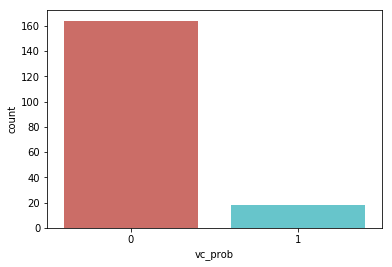

In [49]:
sns.countplot(x='vc_prob',data=df_new, palette='hls')
plt.show()

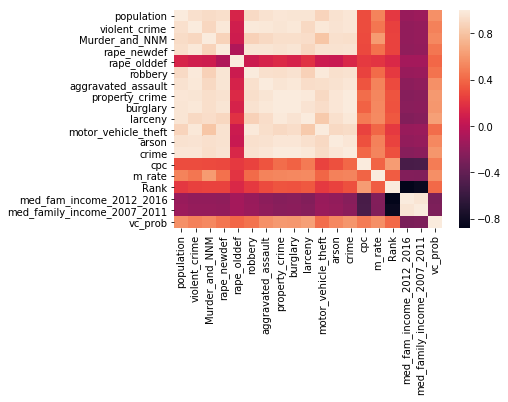

In [50]:
sns.heatmap(df_new.corr())
plt.show()

In [51]:
df_ev = df_new.drop(['Murder_and_NNM', 'rape_newdef','rape_olddef', 'robbery', 'aggravated_assault', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft', 'arson'], axis=1)
#df_ev = df_new.drop(columns=['Murder_and_NNM', 'rape_newdef','rape_olddef', 'robbery', 'aggravated_assault', 'property_crime', 'burglary', 'larceny', 'motor_vehicle_theft', 'arson'])

In [67]:
df_ev.head()

,City,population,violent_crime,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob,inc_size,propc_rating
105,New Albany,8772.0,2.0,101.0,0.011514,0.0,1,214850.0,202243.0,0,High,High
72,Indian Hill,5789.0,2.0,54.0,0.009328,0.0,2,211795.0,250000.0,0,High,High
129,Powell,12093.0,2.0,85.0,0.007029,0.0,4,146442.0,151066.0,0,High,High
45,Dublin,43387.0,10.0,570.0,0.013138,0.0,5,144005.0,143619.0,0,High,Low
70,Hudson,22340.0,3.0,135.0,0.006043,0.0,6,140575.0,141700.0,0,High,High


In [69]:
df_ev = df_ev.drop(['City'], axis=1)

In [53]:
df_ev.corr()

,population,violent_crime,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob
population,1.000000,0.942972,0.975990,0.299019,0.511047,0.220264,-0.159601,-0.148838,0.572869
violent_crime,0.942972,1.000000,0.975138,0.297480,0.463424,0.259433,-0.188328,-0.176063,0.502172
crime,0.975990,0.975138,1.000000,0.402188,0.521579,0.316148,-0.233811,-0.220444,0.594258
cpc,0.299019,0.297480,0.402188,1.000000,0.384366,0.620232,-0.518984,-0.511933,0.480309
m_rate,0.511047,0.463424,0.521579,0.384366,1.000000,0.358184,-0.259173,-0.261275,0.561358
Rank,0.220264,0.259433,0.316148,0.620232,0.358184,1.000000,-0.876544,-0.830105,0.412400
med_fam_income_2012_2016,-0.159601,-0.188328,-0.233811,-0.518984,-0.259173,-0.876544,1.000000,0.970083,-0.292540
med_family_income_2007_2011,-0.148838,-0.176063,-0.220444,-0.511933,-0.261275,-0.830105,0.970083,1.000000,-0.282002
vc_prob,0.572869,0.502172,0.594258,0.480309,0.561358,0.412400,-0.292540,-0.282002,1.000000


In [54]:
df_ev['vc_prob'].value_counts()

0    164
1     18
Name: vc_prob, dtype: int64

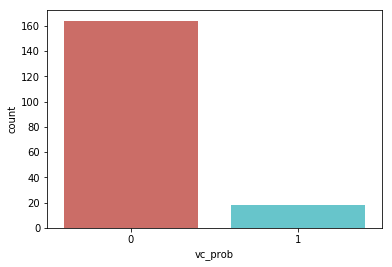

In [55]:
sns.countplot(x='vc_prob', data=df_new, palette='hls')
plt.show()
plt.savefig('count_plot')

In [56]:
df_new.groupby('vc_prob').mean()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011
vc_prob,,,,,,,,,,,,,,,,,,
0,16668.018293,20.420732,0.207317,3.365854,0.780488,7.286585,8.780488,449.115854,83.652439,352.390244,13.073171,1.902439,469.536585,0.028365,0.000012,113.493902,72413.451220,73317.292683
1,93332.166667,854.888889,13.055556,60.555556,11.666667,437.888889,331.722222,5251.611111,1692.500000,3080.944444,478.166667,59.000000,6106.500000,0.062893,0.000102,211.833333,44107.222222,45988.944444


In [57]:
df_new.groupby('inc_size').mean()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob
inc_size,,,,,,,,,,,,,,,,,,,
High,19264.217391,11.652174,0.108696,1.586957,1.304348,3.869565,4.782609,312.195652,53.347826,250.130435,8.717391,1.456522,323.847826,0.015582,0.000007,30.782609,108722.826087,108104.543478,0.000000
Low,15720.891304,31.956522,0.347826,4.630435,1.543478,13.434783,12.000000,585.282609,116.934783,449.043478,19.304348,3.500000,617.239130,0.035942,0.000017,154.717391,54850.673913,56231.652174,0.021739
Medium,19372.422222,23.822222,0.222222,3.288889,0.888889,9.577778,9.844444,477.600000,80.333333,381.200000,16.066667,1.800000,501.422222,0.025719,0.000007,93.022222,70609.555556,71346.444444,0.044444
Very low,42943.555556,347.977778,5.288889,26.844444,3.711111,174.444444,137.688889,2342.400000,727.466667,1420.733333,194.200000,23.666667,2690.377778,0.050145,0.000051,215.711111,43731.666667,46261.822222,0.333333


In [58]:
df_new.groupby('propc_rating').mean()

,population,violent_crime,Murder_and_NNM,rape_newdef,rape_olddef,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,crime,cpc,m_rate,Rank,med_fam_income_2012_2016,med_family_income_2007_2011,vc_prob
propc_rating,,,,,,,,,,,,,,,,,,,
Extreme,54816.521739,365.565217,5.456522,29.043478,5.391304,182.934783,142.739130,2756.869565,798.347826,1751.695652,206.826087,26.652174,3122.434783,0.051775,0.000051,172.152174,53611.108696,54980.521739,0.391304
High,8808.113636,5.000000,0.068182,0.954545,0.204545,1.136364,2.636364,96.840909,18.750000,75.681818,2.409091,0.386364,101.840909,0.013112,0.000006,88.409091,85377.659091,87407.636364,0.000000
Low,20420.577778,26.222222,0.200000,3.955556,1.466667,10.022222,10.577778,550.977778,96.666667,437.311111,17.000000,2.066667,577.200000,0.035420,0.000013,117.688889,69414.622222,71108.955556,0.000000
Medium,12276.555556,11.222222,0.133333,1.866667,0.333333,3.577778,5.311111,273.622222,50.777778,214.711111,8.133333,0.844444,284.844444,0.027346,0.000011,116.222222,69840.622222,68812.644444,0.000000
None,16523.000000,8.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000467,0.000000,45.500000,90261.000000,90162.500000,0.000000


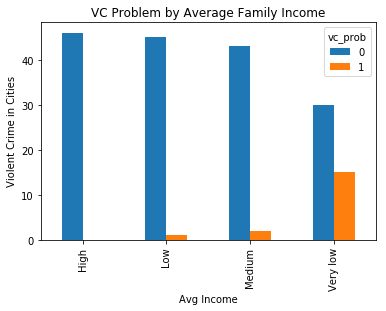

In [59]:
%matplotlib inline
pd.crosstab(df_new.inc_size,df_new.vc_prob).plot(kind='bar')
plt.title('VC Problem by Average Family Income')
plt.xlabel('Avg Income')
plt.ylabel('Violent Crime in Cities')
plt.savefig('vc_prob_by_inc')

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(df_ev, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [ ]:
#Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

#Ridge Regression:
#Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
#Minimization objective = LS Obj + α * (sum of square of coefficients)
#Lasso Regression:
#Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
#Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
#Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

#If terms like ‘penalty’ and ‘regularization’ seem very unfamiliar to you, don’t worry we’ll talk about these in more detail through the course of this article. Before digging further into how they work, lets try to get some intuition into why penalizing the magnitude of coefficients should work in the first place.



In [95]:
'''Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(df_ev, power, models_to_plot):
    #initialize predictors:
    predictors=['med_fam_income_2012_2016']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(df_ev[predictors],df_ev['violent_crime'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(df_ev['med_fam_income_2012_2016'],y_pred)
        plt.plot(df_ev['med_fam_income_2012_2016'],df_ev['violent_crime'],'.')
        plt.title('Plot for power: %d'%power)
        plt.show()
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['violent_crime'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret'''

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [61]:
df_d = df.drop(['City'], axis=1)

In [73]:
# Declare predictors.
X_statsmod = df_ev[['med_fam_income_2012_2016', 'population']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df_ev['vc_prob'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.085903
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                vc_prob   No. Observations:                  182
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:                  0.7338
Time:                        12:09:50   Log-Likelihood:                -15.634
converged:                       True   LL-Null:                       -58.724
                                        LLR p-value:                 1.933e-19
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
med_fam_income_2012_2016    -0.0002   5.35e-05     -2.928      0.003      -0.00

/Users/nadiahaven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
df_e = df.drop(['City'], axis=1)

In [85]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df_e.iloc[trainsize:, :].copy()
df_train = df_e.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['violent_crime'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['violent_crime'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)


R-squared simple model:
1.0


In [86]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.999999998908
[  1.91410058e-07   2.49596331e-01   2.57951207e-01   2.58733183e-01
   2.62430811e-01   2.62587195e-01  -5.53426240e-01  -1.84328787e-01
  -1.84438474e-01  -1.84658984e-01   9.92366454e-04   7.37872494e-01
  -1.15390132e-03   6.34289690e-06]
0.999999998908

Parameter Estimates for the same predictors for the small modeland large model:
[[0.000 0.000]
 [0.250 0.250]
 [0.258 0.258]
 [0.259 0.259]
 [0.262 0.262]
 [0.263 0.263]
 [-0.553 -0.553]
 [-0.184 -0.184]
 [-0.184 -0.184]
 [-0.185 -0.185]
 [0.001 0.001]
 [0.738 0.738]
 [-0.001 -0.001]
 [0.000 0.000]]


In [87]:
df_d['income']= df_new['med_fam_income_2012_2016']

In [91]:
#lasso
trainsize = int(df_ev.shape[0] / 2)
df_test = df_d.iloc[trainsize:, :].copy()
df_train = df_d.iloc[:trainsize, :].copy()

Y_train = df_train['violent_crime'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['violent_crime'])]

In [92]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['violent_crime'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['violent_crime'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['violent_crime'])]

# Test the more complex model with larger coefficients.
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['violent_crime'])]


In [93]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
#print('\nR² for the model with many features:')
#print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
#print('\nParameter estimates for the model with many features:')
#print(origparams)

R² for the model with few features:
0.999958022608

Parameter estimates for the model with few features:
[  8.94947364e-06   1.95201934e-01   2.09241176e+00   1.93734441e+00
   1.14582282e+00   9.30627862e-01  -2.15804293e-02  -8.44055840e-04
   8.89868799e-03  -1.42717440e-01   1.99540453e-02   6.70579260e-03
   0.00000000e+00   0.00000000e+00  -9.57549763e-06   1.37170104e+00]


In [ ]:
# importing basic libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

import test and train file

trainsize = int(df_ev.shape[0] / 2)
df_test = df_ev.iloc[trainsize:, :].copy()
df_train = df_ev.iloc[:trainsize, :].copy()

Y_train = df_train['violent_crime'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['violent_crime'])]

train = pd.read_csv('Train.csv')

test = pd.read_csv('test.csv')

# importing linear regressionfrom sklearn

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

splitting into training and cv for cross validation

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

training the model

lreg.fit(x_train,y_train)

predicting on cv

pred = lreg.predict(x_cv)

calculating mse

mse = np.mean((pred - y_cv)**2)






